# Learning Gradient Descent on simple Linear Regression
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fproxy%2F1*f9a162GhpMbiTVTAua_lLQ.png&f=1&nofb=1&ipt=805d9e50f2a1fcc47ee1ea414285fc2c661da587c8d5c8fabfd5ffc8a58f90e8&ipo=images" alt="image" width="800" height="250"/>

first we import the required libraries.

In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [54]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

### Calculating The Cost Of Linear Regression using MSE
To start building the Gradient Descent, first we need to get the functions ready and test that they are indeed working.

The first step would be to calculate the cost function.

$$
  f_{\mathbf{\vec{w}, b}} =
  \vec{w} \cdot \vec{x} + b
  \quad (1)
$$

$$
  J(\vec{w}, b) =
  \frac{1}{2 m} % The Fraction
  \sum_{i=1}^{m} % The Submission
  (f_{\mathbf{\vec{w}}, b} (\mathbf{\vec{x}}^{(i)}) % Function f(x)
  -
  y^{(i)}) ^ 2
  \quad (2)
 $$

In [55]:
def compute_cost(x, y, w, b):
  j_wb = 0
  m = x.shape[0]

  for i in range(m):
    f_wb = w * x[i] + b
    j_wb += (f_wb - y[i]) ** 2
  j_wb /= (2 * m)

  return j_wb

### Calculating the derivatives to use in Gradient Descent Implementation

$$
  \frac{\partial J(w,b)}{\partial w} =
  \frac{1}{m}
  \sum_{i = 1}^{m}
  (f_{\mathbf{\vec{w}, b}}(x^{(i)}) - y^{(i)}) * x^{(i)}
  \quad (1)
$$

$$
  \frac{\partial J(w,b)}{\partial b} =
  \frac{1}{m}
  \sum_{i = 1}^{m}
  (f_{\mathbf{\vec{w}, b}}(x^{(i)}) - y^{(i)})
  \quad (2)
$$

&nbsp;

$$
  \text{Repeat Until Convergence: \{}
  \quad (3)
$$

$$
\begin{align*}
  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \\
  b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}
\end{align*}
$$

$$\hspace{-4cm}\text{\}}$$

In [56]:
def compute_derv(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw += (f_wb - y[i]) * x[i]
    dj_db += (f_wb - y[i])
  dj_dw /= m
  dj_db /= m

  return dj_dw, dj_db

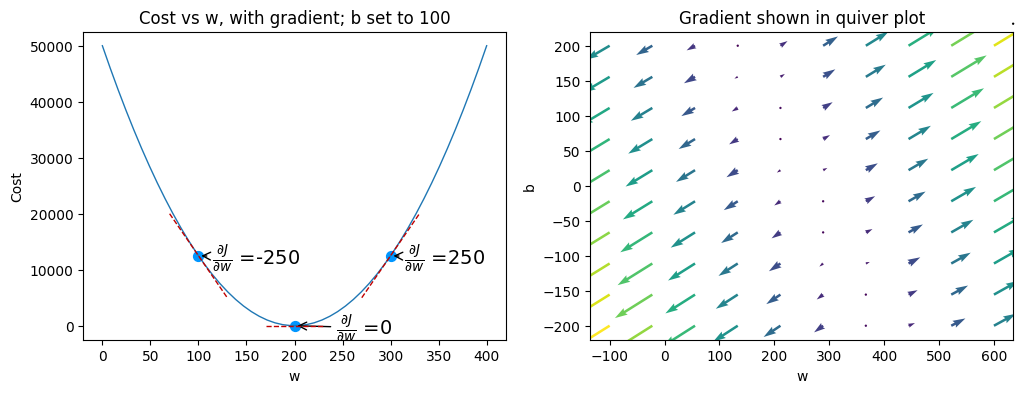

In [57]:
plt_gradients(x_train, y_train, compute_cost, compute_derv)
plt.show()

In [58]:
def gradient_descent(x, y, w_init, b_init, alpha, itrs, calc_cost, calc_derv):
  '''
    p_history = paramater history
  '''

  j_hist = []
  p_hist = []
  currW = w_init
  currB = b_init

  for i in range(itrs):
    dj_dw, dj_db = calc_derv(x, y, currW, currB)

    currW -= alpha * dj_dw
    currB -= alpha * dj_db

    if i < 100000:
            j_hist.append( calc_cost(x, y, currW, currB) )
            p_hist.append( [currW, currB] )

    if i % math.ceil(itrs / 10) == 0:
            print(f"Iteration {i:4}: Cost {j_hist[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {currW: 0.3e}, b:{currB: 0.5e}")

  return currW, currB, j_hist, p_hist

### Calculating the final results and plotting them

In [66]:
w_init = 0
b_init = 0
iterations = 4000
tmp_alpha = 2.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_derv)

print(f"(w,b) found by Gradient Descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.37e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  1.300e+01, b: 8.00000e+00
Iteration  400: Cost 4.56e+00  dj_dw: -4.295e-01, dj_db:  6.949e-01   w:  1.941e+02, b: 1.09512e+02
Iteration  800: Cost 1.42e+00  dj_dw: -2.395e-01, dj_db:  3.875e-01   w:  1.967e+02, b: 1.05304e+02
Iteration 1200: Cost 4.41e-01  dj_dw: -1.336e-01, dj_db:  2.161e-01   w:  1.982e+02, b: 1.02958e+02
Iteration 1600: Cost 1.37e-01  dj_dw: -7.448e-02, dj_db:  1.205e-01   w:  1.990e+02, b: 1.01650e+02
Iteration 2000: Cost 4.27e-02  dj_dw: -4.153e-02, dj_db:  6.720e-02   w:  1.994e+02, b: 1.00920e+02
Iteration 2400: Cost 1.33e-02  dj_dw: -2.316e-02, dj_db:  3.748e-02   w:  1.997e+02, b: 1.00513e+02
Iteration 2800: Cost 4.12e-03  dj_dw: -1.292e-02, dj_db:  2.090e-02   w:  1.998e+02, b: 1.00286e+02
Iteration 3200: Cost 1.28e-03  dj_dw: -7.203e-03, dj_db:  1.165e-02   w:  1.999e+02, b: 1.00160e+02
Iteration 3600: Cost 3.99e-04  dj_dw: -4.017e-03, dj_db:  6.499e-03   w:  1.999e+02, b: 1.00089e+02


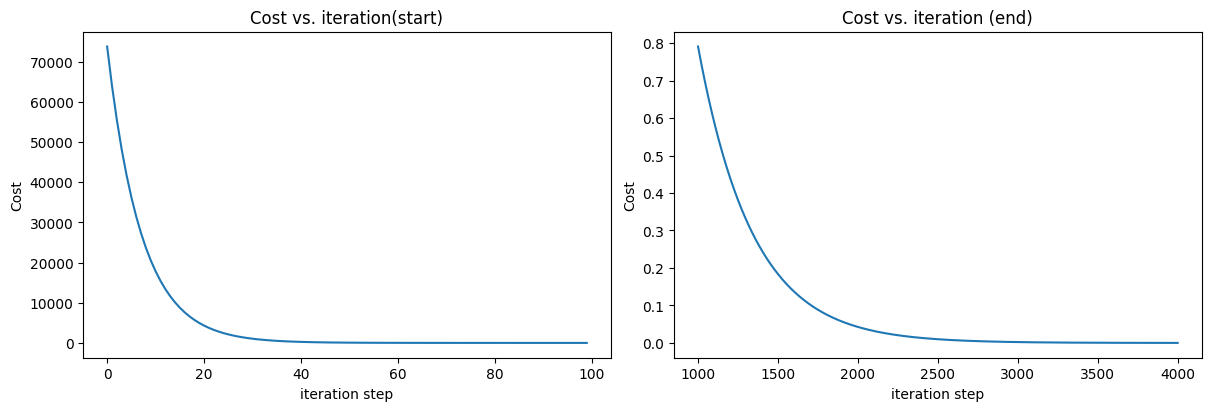

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;          ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;          ax2.set_xlabel('iteration step')
plt.show()

In [68]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


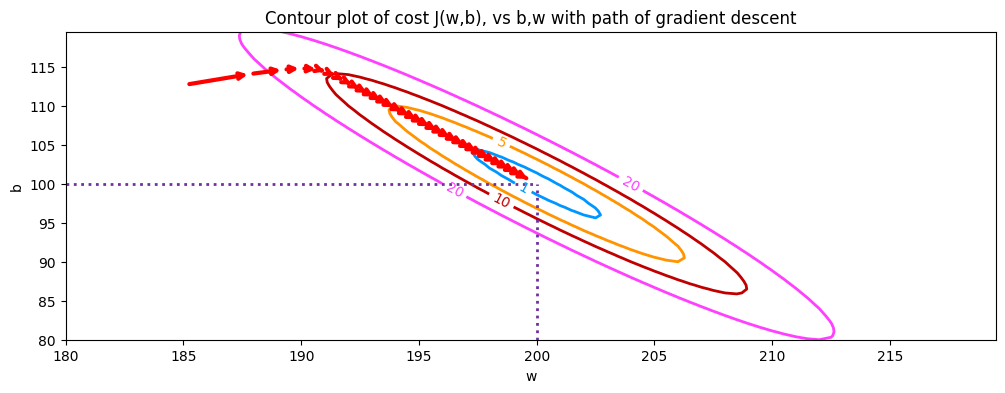

In [70]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

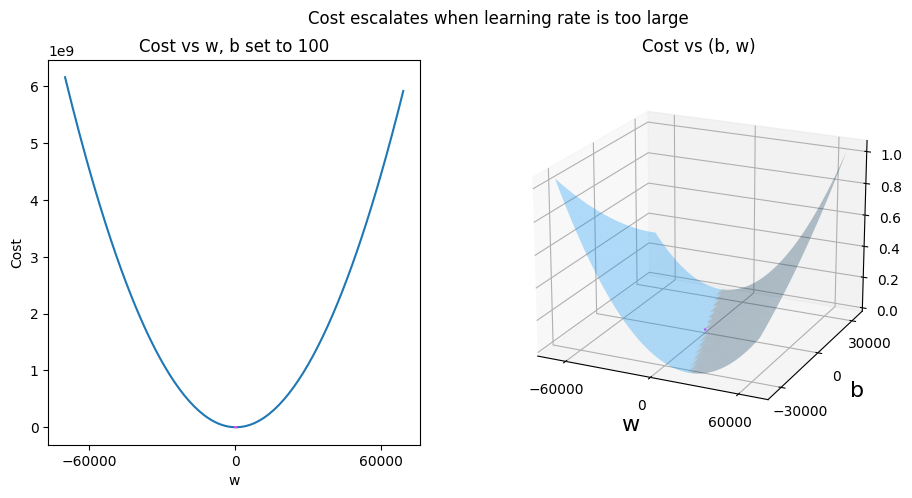

In [71]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()